In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/Jay Patel/OneDrive/Desktop/Datasets/Sample - Superstore.csv", encoding='latin1')

df['Order Date'] = pd.to_datetime(df['Order Date'])


C:\Users\Jay Patel\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


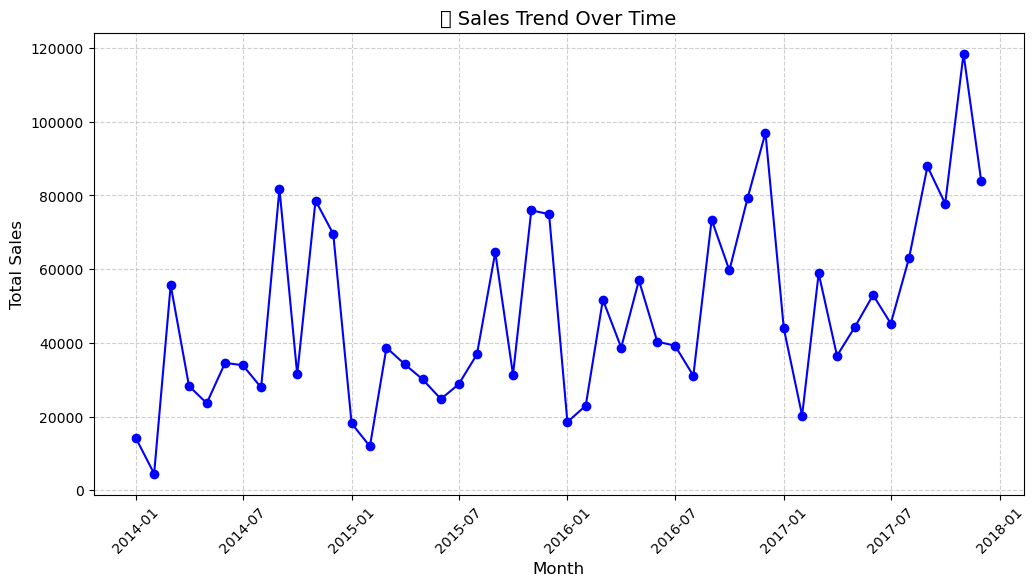

In [2]:
# Monthly sales trend
sales_trend = df.groupby(df['Order Date'].dt.to_period('M')).agg({'Sales':'sum'})
sales_trend.index = sales_trend.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(sales_trend.index, sales_trend['Sales'], marker='o', color='blue')
plt.title("📈 Sales Trend Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


C:\Users\Jay Patel\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


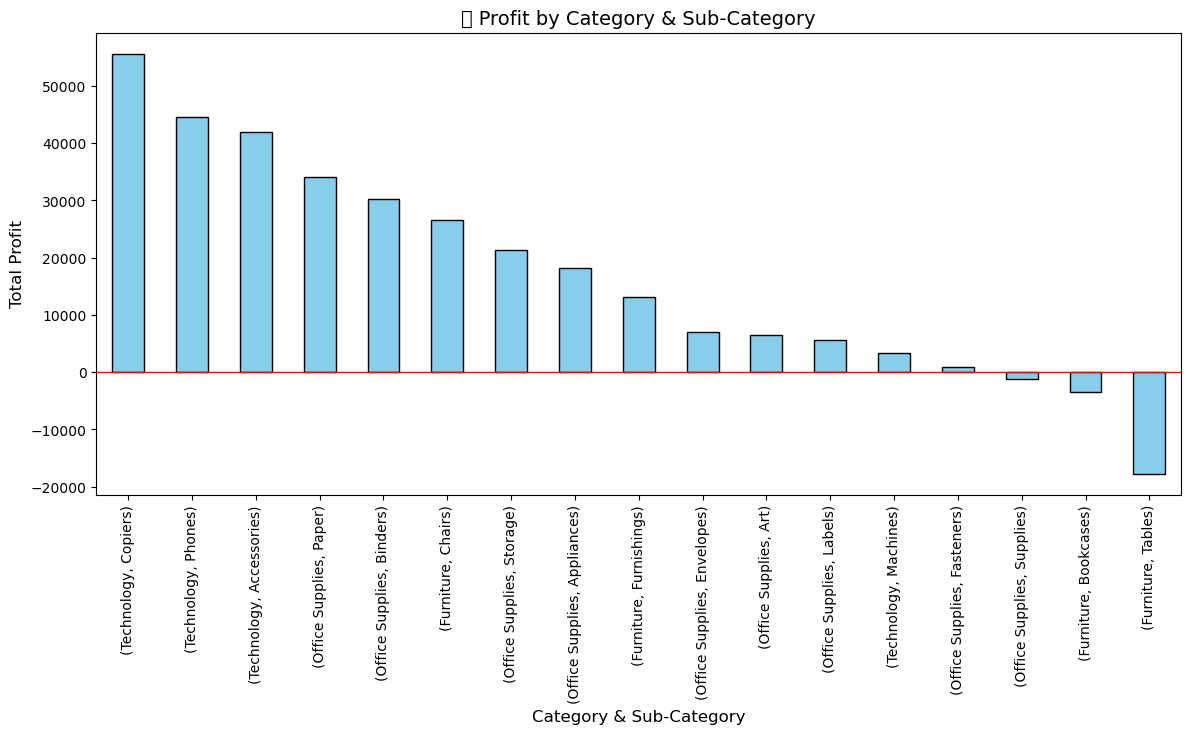

In [3]:
profit_category = df.groupby(['Category','Sub-Category']).agg({'Profit':'sum'}).sort_values('Profit', ascending=False)

plt.figure(figsize=(14,6))
profit_category['Profit'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("💰 Profit by Category & Sub-Category", fontsize=14)
plt.ylabel("Total Profit", fontsize=12)
plt.xlabel("Category & Sub-Category", fontsize=12)
plt.xticks(rotation=90)
plt.axhline(0, color='red', linewidth=1)  # show loss line
plt.show()


C:\Users\Jay Patel\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


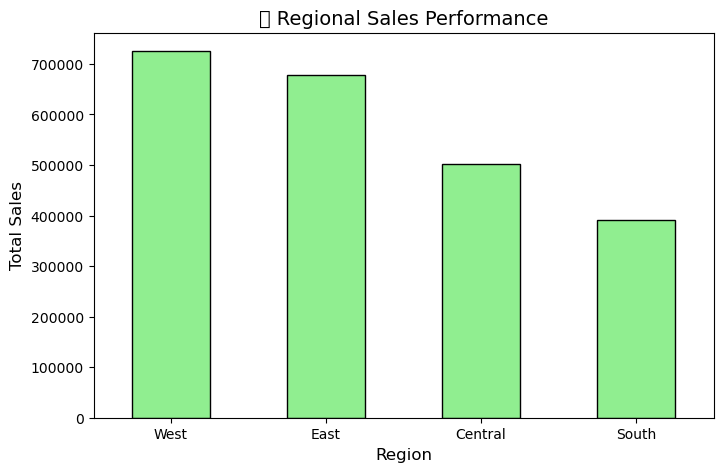

In [4]:
region_sales = df.groupby('Region').agg({'Sales':'sum'}).sort_values('Sales', ascending=False)

plt.figure(figsize=(8,5))
region_sales['Sales'].plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("🌍 Regional Sales Performance", fontsize=14)
plt.ylabel("Total Sales", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.xticks(rotation=0)
plt.show()


C:\Users\Jay Patel\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


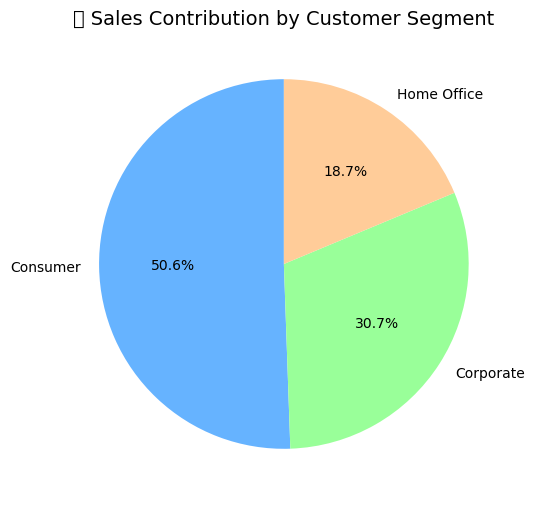

In [5]:
segment_sales = df.groupby('Segment').agg({'Sales':'sum'})

plt.figure(figsize=(6,6))
plt.pie(segment_sales['Sales'], labels=segment_sales.index, autopct='%1.1f%%',
        startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title("👥 Sales Contribution by Customer Segment", fontsize=14)
plt.show()


C:\Users\Jay Patel\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


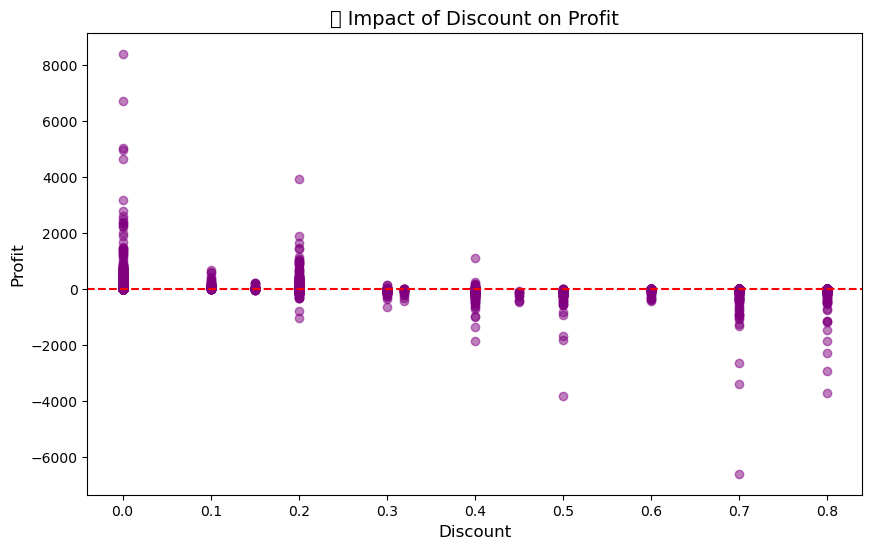

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(df['Discount'], df['Profit'], alpha=0.5, color='purple')
plt.title("📉 Impact of Discount on Profit", fontsize=14)
plt.xlabel("Discount", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.axhline(0, color='red', linestyle='--')
plt.show()
